In [1]:
import pandas as pd
import numpy as np
from dotenv import dotenv_values, find_dotenv
import matplotlib.pyplot as plt
import os
config = dotenv_values(find_dotenv())
path_cleandata = os.path.abspath(config["CLEANDATA"]) + '\\'
path_figures = os.path.abspath(config["FIGURES"]) + '\\'

In [2]:
# import my merged data
data = pd.read_pickle(path_cleandata + 'BEA6_IOuse_merged.pkl')


In [8]:
data.head(30)

,product_I,product_O,IO_value,date,quantityindex_I,priceindex_I,expenditures_I,quantityindex_O,priceindex_O,expenditures_O
0,All other professional...,All other professional...,1147.0,1959-01-31,NaN,NaN,NaN,NaN,NaN,NaN
1,All other professional...,All other professional...,1147.0,1959-04-30,NaN,NaN,NaN,NaN,NaN,NaN
2,All other professional...,All other professional...,1147.0,1959-07-31,NaN,NaN,NaN,NaN,NaN,NaN
3,All other professional...,All other professional...,1147.0,1959-10-31,NaN,NaN,NaN,NaN,NaN,NaN
4,All other professional...,All other professional...,1147.0,1960-01-31,NaN,NaN,NaN,NaN,NaN,NaN
5,All other professional...,All other professional...,1147.0,1960-04-30,NaN,NaN,NaN,NaN,NaN,NaN
6,All other professional...,All other professional...,1147.0,1960-07-31,NaN,NaN,NaN,NaN,NaN,NaN
7,All other professional...,All other professional...,1147.0,1960-10-31,NaN,NaN,NaN,NaN,NaN,NaN
8,All other professional...,All other professional...,1147.0,1961-01-31,NaN,NaN,NaN,NaN,NaN,NaN
9,All other professional...,All other professional...,1147.0,1961-04-30,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# filter for the year 2017 
data2017 = data[data['date'].dt.year == 2017]

In [9]:
# two separate plots for input vs output products?
# so if the expenditures really do line up with the I-O table values then i believe it wont matter? 
# ask nick about this

data_I = data2017[['date', 'product_I', 'IO_value', 'expenditures_I']]

data_O = data2017[['date', 'product_O', 'IO_value', 'expenditures_O']]

In [10]:
data_I.head(16)

,date,product_I,IO_value,expenditures_I
232,2017-01-31,All other professional...,1147.0,62631.0
233,2017-04-30,All other professional...,1147.0,62704.0
234,2017-07-31,All other professional...,1147.0,64265.0
235,2017-10-31,All other professional...,1147.0,65363.0
491,2017-01-31,All other professional...,719.0,62631.0
492,2017-04-30,All other professional...,719.0,62704.0
493,2017-07-31,All other professional...,719.0,64265.0
494,2017-10-31,All other professional...,719.0,65363.0
750,2017-01-31,All other professional...,115.0,62631.0
751,2017-04-30,All other professional...,115.0,62704.0


In [27]:
# sum by product for that year
# what i actually need to do: get the sum of expenditures in each product across all quarters, get the sum of use value across products but mean across quarters

# how im doing it:

# first groupby: take sum of IO_value and mean of expenditures_I by date and product
byproduct_I = data_I.groupby(['date', 'product_I']).agg({
    'IO_value': 'sum',
    'expenditures_I': 'mean'}, min_count=1).reset_index()

byproduct_O = data_O.groupby(['date', 'product_O']).agg({
    'IO_value': 'sum',
    'expenditures_O': 'mean'}, min_count=1).reset_index()

# next groupby: take mean of IO_value and sum of expenditures_I by product only
byproduct_I = byproduct_I.groupby(['product_I']).agg({
    'IO_value': 'mean',
    'expenditures_I': 'sum'}, min_count=1)

byproduct_O = byproduct_O.groupby(['product_O']).agg({
    'IO_value': 'mean',
    'expenditures_O': 'sum'}, min_count=1)

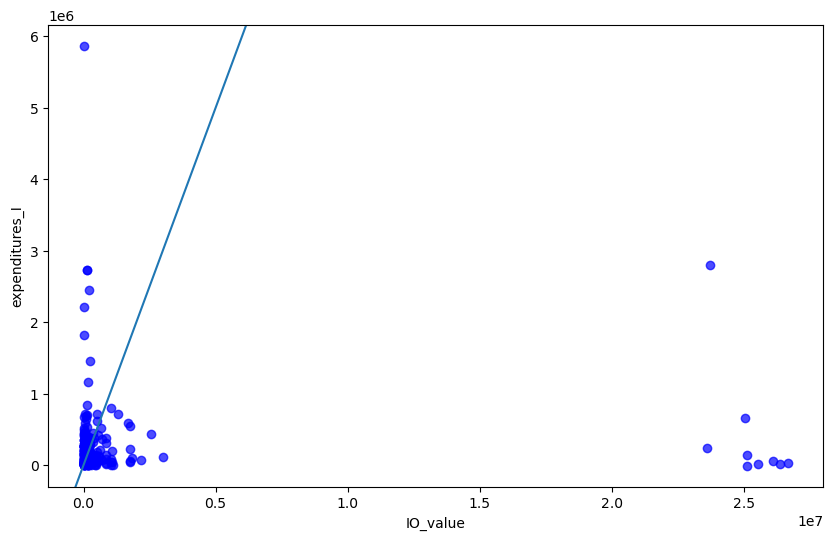

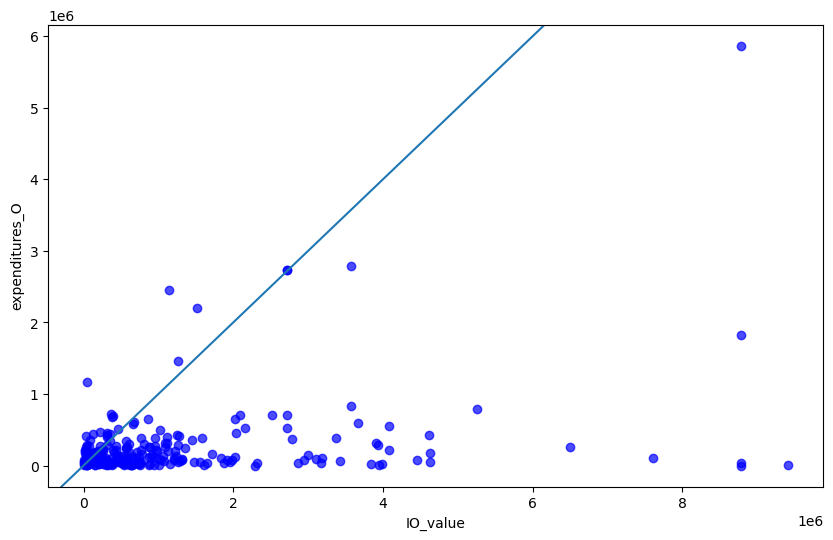

In [28]:
# do the scatter plot with expenditures on the x axis

plt.figure(figsize=(10, 6))
plt.scatter( byproduct_I['IO_value'], byproduct_I['expenditures_I'], c='blue', alpha=0.7)

plt.xlabel('IO_value')
plt.ylabel('expenditures_I')

ax = plt.gca()
ax.axline((0, 0), slope=1)

plt.savefig(path_figures + 'merge_check\\expenditures_I.pdf')

# do the scatter plot with expenditures on the x axis
plt.figure(figsize=(10, 6))
plt.scatter( byproduct_O['IO_value'], byproduct_O['expenditures_O'], c='blue', alpha=0.7)

plt.xlabel('IO_value')
plt.ylabel('expenditures_O')

ax = plt.gca()
ax.axline((0, 0), slope=1)

plt.savefig(path_figures + 'merge_check\\expenditures_O.pdf')

c:\Users\EmilyFu\.conda\envs\myenv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\EmilyFu\.conda\envs\myenv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\EmilyFu\.conda\envs\myenv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


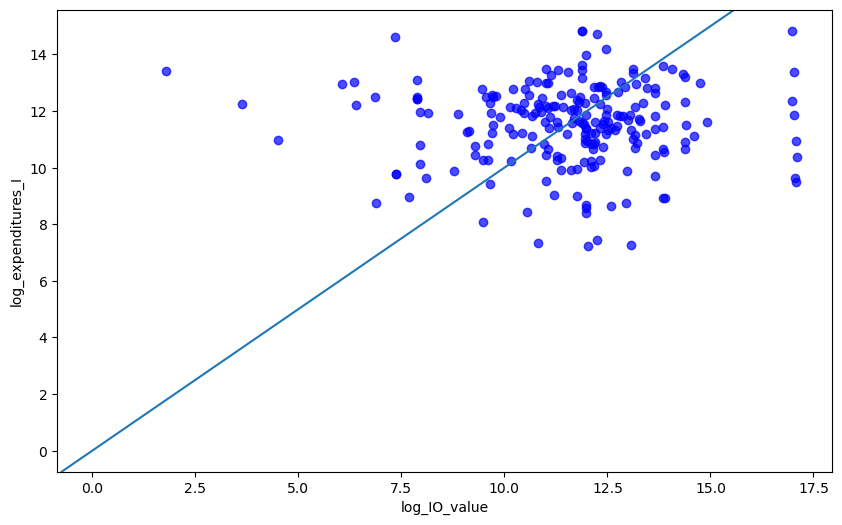

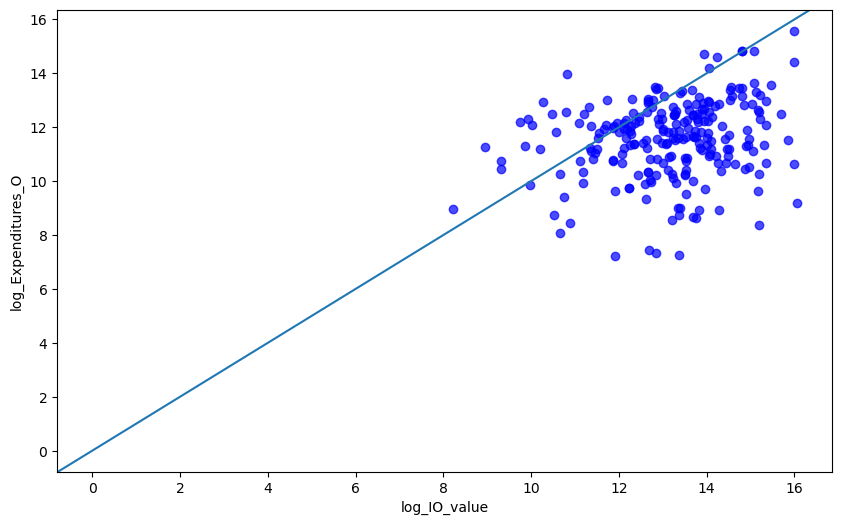

In [29]:
# get logs of everything and do an equivalent scatter plot with those

# do the scatter plot with expenditures on the x axis
plt.figure(figsize=(10, 6))
plt.scatter(np.log(byproduct_I['IO_value']), np.log(byproduct_I['expenditures_I']), c='blue', alpha=0.7)

plt.xlabel('log_IO_value')
plt.ylabel('log_expenditures_I')

ax = plt.gca()
ax.axline((0, 0), slope=1)

plt.savefig(path_figures + 'merge_check\\log_expenditures_I.pdf')

# do the scatter plot with expenditures on the x axis
plt.figure(figsize=(10, 6))
plt.scatter(np.log(byproduct_O['IO_value']), np.log(byproduct_O['expenditures_O']), c='blue', alpha=0.7)

plt.xlabel('log_IO_value')
plt.ylabel('log_Expenditures_O')

ax = plt.gca()
ax.axline((0, 0), slope=1)

plt.savefig(path_figures + 'merge_check\\log_expenditures_O.pdf')